In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 


In [2]:
# загрузим данные
df = pd.read_csv('values_from_the_instrument.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()


,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='cluster', ylabel='silhouette'>

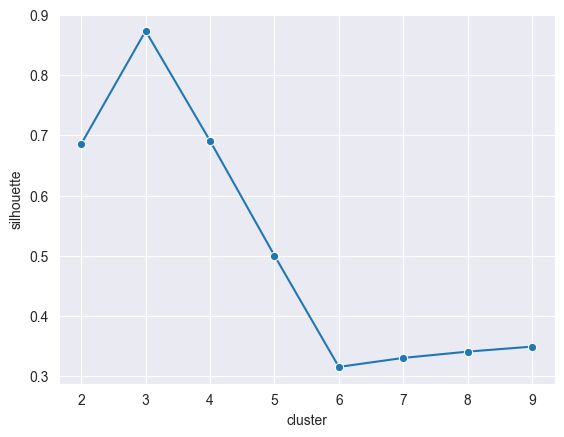

In [4]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
